In [53]:
%matplotlib inline
import utils
reload(utils)

<module 'utils' from 'utils.py'>

Loading data from us sample

In [7]:

%time X_us_train, X_us_test, y_us_train, y_us_test = utils.LoadDataset('data_0901/data20to26/US', 0.33)
%time X_iran_train, X_iran_test, y_iran_train, y_iran_test = utils.LoadDataset('data_0901/data20to26/Iran', 0.33)

CPU times: user 7.54 s, sys: 1.54 s, total: 9.08 s
Wall time: 9.09 s
CPU times: user 11.5 s, sys: 4.09 s, total: 15.6 s
Wall time: 17.7 s


Train random forest models

In [8]:
from sklearn.ensemble import RandomForestClassifier
rndf_us = RandomForestClassifier(n_estimators=30, max_depth=None,min_samples_split=10, random_state=0)
%time rndf_us = rndf_us.fit(X_us_train, y_us_train)
rndf_iran = RandomForestClassifier(n_estimators=30, max_depth=None,min_samples_split=10, random_state=0)
%time rndf_iran = rndf_iran.fit(X_iran_train, y_iran_train)

CPU times: user 2min 39s, sys: 908 ms, total: 2min 40s
Wall time: 2min 40s
CPU times: user 6min 50s, sys: 1.16 s, total: 6min 51s
Wall time: 6min 52s


Evaluate classifiers

In [56]:

print "Us on US", utils.classifierMetrics(rndf_us, X_us_test, y_us_test), "Iran on US", utils.classifierMetrics(rndf_us, X_iran_test, y_iran_test)
print "Iran on Iran", utils.classifierMetrics(rndf_iran, X_iran_test, y_iran_test), "US on Iran",utils.classifierMetrics(rndf_iran, X_iran_test, y_iran_test)


Us on US  mean_precision:0.64323310447 roc_auc_score :0.651091667659 Iran on US  mean_precision:0.586462688952 roc_auc_score :0.61103437529
Iran on Iran  mean_precision:0.625071690412 roc_auc_score :0.661160272878 US on Iran  mean_precision:0.625071690412 roc_auc_score :0.661160272878


In [60]:
feature_names=["same_country","same_locale","gender_mm","gender_mf","gender_mu","gender_fm","gender_ff","gender_fu",
               "gender_um","gender_uf","gender_uu","gender_m","gender_f","gender_u","picture_daily","update_profile_daily",
               "wink_daily","picture_30days","num_face","age","beauty","bright","sharp","white","indian","asian","distance",
               "fav_ratio"]
ftrs = [(n, s1, s2) for (n, s1, s2) in zip(feature_names, rndf_us.feature_importances_, rndf_iran.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US", "Iran"))

Feature,US,Iran
wink_daily,0.201930043533,0.237854163252
distance,0.199992267451,0.241582293873
picture_daily,0.0954007149414,0.115239168815
age,0.068056166397,0.0451558980199
beauty,0.0675870254709,0.0430825484711
update_profile_daily,0.0669476222313,0.0784726964646
fav_ratio,0.0557074929764,0.0482028921179
bright,0.0534149596199,0.0336258201058
sharp,0.0416683152494,0.0276792801846
white,0.0281426825517,0.0205560478724


Precision Recall curves

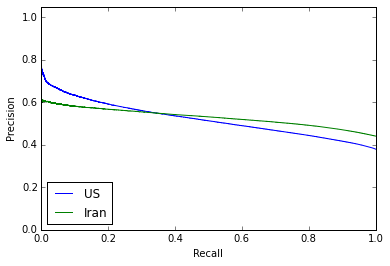

In [26]:
from sklearn.metrics import precision_recall_curve
y_us_score = rndf_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
y_iran_score = rndf_us.predict_proba(X_iran_test)
precision_iran, recall_iran, _ = precision_recall_curve(y_iran_test, y_iran_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),(recall_iran, precision_iran, "Iran")))

Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr_us = LogisticRegression(penalty='l2')
%time lr_us= lr_us.fit(X_us_train, y_us_train)
print "US", utils.classifierMetrics(lr_us, X_us_test, y_us_test)
lr_iran = LogisticRegression(penalty='l2')
%time lr_iran= lr_iran.fit(X_iran_train, y_iran_train)
print "Iran", utils.classifierMetrics(lr_iran, X_iran_test, y_iran_test)

CPU times: user 18.3 s, sys: 0 ns, total: 18.3 s
Wall time: 18.3 s
US  mean_precision:0.621494980838 roc_auc_score :0.583819218902
CPU times: user 34.2 s, sys: 20 ms, total: 34.2 s
Wall time: 34.3 s
Iran  mean_precision:0.575726302025 roc_auc_score :0.594774447859


In [40]:
lr_us.coef_[0,:]
ftrs = [(n, s1, s2) for (n, s1, s2) in zip(feature_names, lr_us.coef_[0,:], lr_iran.coef_[0,:])]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US", "Iran"))

Feature,US,Iran
fav_ratio,1.44463000029,0.874731411073
gender_ff,0.541891554621,0.186453512939
bright,0.411450454996,0.394095351131
gender_uf,0.245155074601,-0.20024832963
num_face,0.147820635923,0.0848038899369
same_locale,0.0761271342531,-0.0680560592796
gender_u,0.0345773235963,0.104418829241
sharp,0.0247681330387,-0.405806003273
same_country,0.0216413776541,0.339399701704
picture_daily,0.021286343026,0.111744465342


GB Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_us = GradientBoostingClassifier()
%time gb_us= gb_us.fit(X_us_train, y_us_train)
gb_iran = GradientBoostingClassifier()
%time gr_iran= gb_iran.fit(X_iran_train, y_iran_train)

In [59]:
print "US", utils.classifierMetrics(gb_us, X_us_test, y_us_test)
print "Iran", utils.classifierMetrics(gb_iran, X_iran_test, y_iran_test)

US  mean_precision:0.63423218979 roc_auc_score :0.636973181579
Iran  mean_precision:0.617128045443 roc_auc_score :0.654101481473


In [61]:
ftrs = [(n, s1, s2) for (n, s1, s2) in zip(feature_names, gb_us.feature_importances_, gb_iran.feature_importances_)]
ftrs.sort(lambda x1, x2: int(10000.0*(x2[1]-x1[1])))
utils.ListTable(ftrs).SetHeaders(("Feature", "US", "Iran"))

Feature,US,Iran
wink_daily,0.219050143379,0.253608956034
distance,0.173189328592,0.183581760071
beauty,0.100346085669,0.0848908653319
age,0.0981751372942,0.112697113862
fav_ratio,0.0490688397113,0.0435657994849
sharp,0.0444810254922,0.0332952666058
same_locale,0.0409434592793,0.00295084559372
picture_daily,0.0323355996812,0.0428291113165
gender_m,0.0291021287268,0.0313271385013
gender_fm,0.0258410512882,0.0051315764002


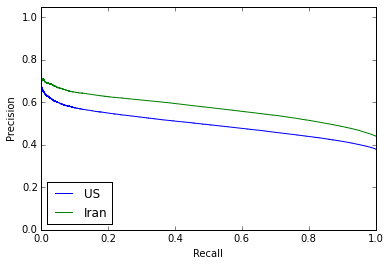

In [63]:
y_us_score = gb_us.predict_proba(X_us_test)
precision_us, recall_us, _ = precision_recall_curve(y_us_test, y_us_score[:,1])
y_iran_score = gb_iran.predict_proba(X_iran_test)
precision_iran, recall_iran, _ = precision_recall_curve(y_iran_test, y_iran_score[:,1])
utils.drawPRCurves(((recall_us, precision_us, "US"),(recall_iran, precision_iran, "Iran")))